https://discourse.julialang.org/t/how-to-define-and-integrate-a-hamiltonianproblem/81303

```julia
using DiffEqPhysics
using DifferentialEquations

function cart_hamiltonian(q, p; g = 9.8, m1 = 2.0 , m2 = 1.0, L = 0.5) 
    (x, θ) = q
    (p_x, p_θ) = p
    h =  g * L * m2 * cos(θ) + 
        (L^2 * m2 * p_x^2 + (m1 + m2)* p_θ^2 - 
        2 *L * m2 * p_x * p_θ * cos(θ) ) / 
        ( 2 * L^2*m2*(m1 + m2 * sin(θ)^2))
    return h
end

a = HamiltonianProblem(cart_hamiltonian,[0,0.3],[0,.1],[0,.2]) # gives me ODE problem?
sol = init(a, Tsit5())
```

```
┌ Warning: Hamiltonians with 3 arguments are deprecated; please use `H(p, q, params, t)`
│   caller = #HamiltonianProblem#1 at hamiltonian.jl:30 [inlined]
└ @ Core D:\.julia\packages\DiffEqPhysics\SeVwO\src\hamiltonian.jl:30
MethodError: no method matching cart_hamiltonian(::Vector{Float64}, ::Vector{ForwardDiff.Dual{ForwardDiff.Tag{DiffEqPhysics.PhysicsTag, Float64}, Float64, 2}}, ::Nothing)
Closest candidates are:
  cart_hamiltonian(::Any, ::Any; g, m1, m2, L) at In[1]:4
```

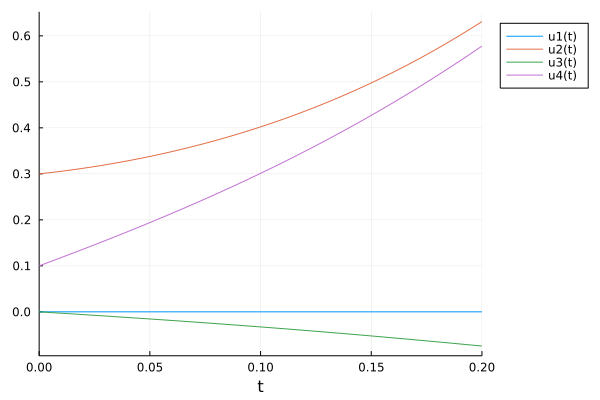

Main.Revision1

In [1]:
module Revision1

using DiffEqPhysics
using DifferentialEquations
using Plots

function cart_hamiltonian(p, q, params, t; g = 9.8, m1 = 2.0 , m2 = 1.0, L = 0.5) 
    (x, θ) = q
    (p_x, p_θ) = p
    h =  g * L * m2 * cos(θ) + 
        (L^2 * m2 * p_x^2 + (m1 + m2)* p_θ^2 - 
        2 *L * m2 * p_x * p_θ * cos(θ) ) / 
        ( 2 * L^2*m2*(m1 + m2 * sin(θ)^2))
    return h
end

a = HamiltonianProblem(cart_hamiltonian,[0,0.3],[0,.1],[0,.2]) # gives me ODE problem?
sol = solve(a, Tsit5())
plot(sol; legend=:outertopright) |> display

end

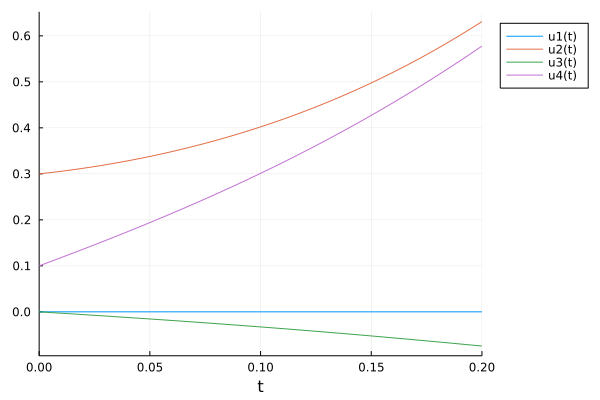

Main.Revision2

In [2]:
module Revision2

using DiffEqPhysics
using DifferentialEquations
using Plots
using StaticArrays

params = (g = 9.8, m1 = 2.0 , m2 = 1.0, L = 0.5)

function cart_hamiltonian(p, q, params, t)
    (; g, m1, m2, L) = params
    (x, θ) = q
    (p_x, p_θ) = p
    h =  g * L * m2 * cos(θ) + 
        (L^2 * m2 * p_x^2 + (m1 + m2)* p_θ^2 - 
        2 *L * m2 * p_x * p_θ * cos(θ) ) / 
        ( 2 * L^2*m2*(m1 + m2 * sin(θ)^2))
    return h
end

p0 = SVector(0.0, 0.3)
q0 = SVector(0.0, 0.1)
tspan = (0.0, 0.2)
a = HamiltonianProblem(cart_hamiltonian, p0, q0, tspan, params)
sol = solve(a, Tsit5())
plot(sol; legend=:outertopright) |> display

end

In [3]:
Revision2.sol

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 7-element Vector{Float64}:
 0.0
 0.004721383764198766
 0.024452481376603552
 0.06017389139934949
 0.10720499147525808
 0.16666979689797284
 0.2
u: 7-element Vector{RecursiveArrayTools.ArrayPartition{Float64, Tuple{StaticArrays.SVector{2, Float64}, StaticArrays.SVector{2, Float64}}}}:
 ([0.0, 0.3], [0.0, 0.1])
 ([0.0, 0.3025387727469516], [-0.001406980111313137, 0.10848798290901543])
 ([0.0, 0.31543178954349294], [-0.0074002918653509955, 0.14474001469097775])
 ([0.0, 0.3486149077898275], [-0.018844172883126214, 0.21454046739394095])
 ([0.0, 0.41375720575392494], [-0.035453022559949574, 0.3178779659546016])
 ([0.0, 0.5375949325873254], [-0.059483921461922384, 0.47432364954145845])
 ([0.0, 0.6310497890309341], [-0.07439104833084505, 0.5777966984540791])